In [53]:
import mlrose_hiive
import numpy as np

from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, KnapsackGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from matplotlib import pyplot as plt
from numpy import inf
import time

In [95]:
# Generate a new TSP problem using a fixed seed.
problem_fit = QueensGenerator().generate(seed=123456, size=20)

In [66]:
# Solve problem using the genetic algorithm
#GA POPSIZE = 200
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=200)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

6.119044303894043
[ 7  4 11 14  5 13  8  3  0 15  9  1  9  2 12 10]
1.0


In [67]:
curve_GA = fitness_curve
fitness_GA = best_fitness
time_GA = end-start

In [68]:
#GA POPSIZE = 250
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=250)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

7.276160001754761
[11  5  7 12  6 13  2 14  0  4 10  9 15  1  3  8]
2.0


In [69]:
#GA POPSIZE = 150
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=50)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

1.355909824371338
[ 5 11 10 14  2  4  1  3 15  6 12  0 13  0  7  9]
2.0


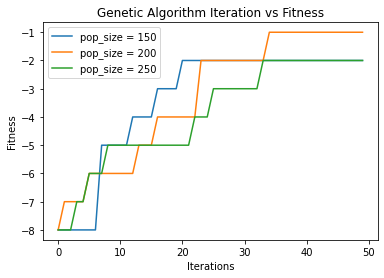

In [70]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Genetic Algorithm Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [9]:
#RCH RESTARTS=0
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=0, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.04252910614013672
[ 4 14 13  8  6 12  2  0  8  7 12  1 15 10  5  9]
5.0


In [13]:
#RCH RESTARTS=10
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=10, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.4714171886444092
[ 5  0 11  7 10  1 14  1 15  6  2 13  7  4 12  3]
2.0


In [14]:
curve_RHC = fitness_curve_pro
fitness_RHC = best_fitness
time_RHC = end -start

In [11]:
#RCH RESTARTS=5
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=5, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.26301050186157227
[ 5  9  4  0  3 11 13  2 12  9  6  1 10 14  7  0]
3.0


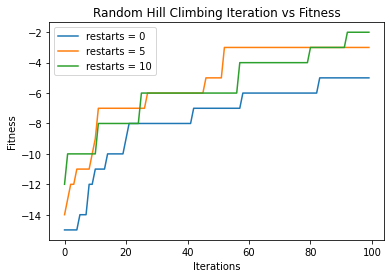

In [12]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='restarts = 5')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='restarts = 10')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Random Hill Climbing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [86]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=30, decay=0.95, min_temp=0.1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.7814362049102783
[ 9 13  2  5  8  2 14  3 11 15  1  6  4 12  7  0]
1.0


In [87]:
#SA schedule = geomdecay decay 0.75
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=30, decay=0.75, min_temp=0.1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.4689755439758301
[14  2  9  6 15  2 11  5  0  4 10  7  3 12  8  1]
1.0


In [88]:
#SA schedule = geomdecay decay 0.55
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=30, decay=0.55, min_temp=0.1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.3227066993713379
[11  3 14 12  1  9  7  0  2  8 15  6 15  5 10 13]
2.0


In [89]:
#SA schedule = geomdecay decay 0.35
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=30, decay=0.35, min_temp=0.1)
best_state, best_fitness, fitness_curve_pro3 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=4)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.6170961856842041
[ 0  5  3  6 13 10 12  9 15  2  4  1  7  8 11 14]
1.0


In [96]:
#SA schedule = geomdecay decay 0.15
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.15, min_temp=0.1)
best_state, best_fitness, fitness_curve_pro4 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=5)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.7256186008453369
[13 15  0  4 16 10 12  1 11  5 19  1  5 17  9  6 18 14  7  3]
2.0


In [97]:
curve_SA = fitness_curve_pro4
fitness_SA = best_fitness
time_SA = end-start

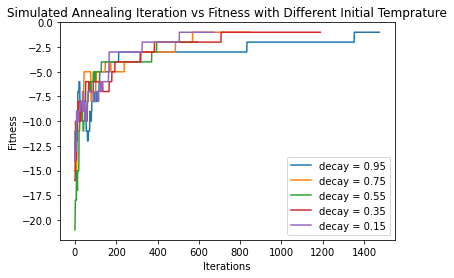

In [92]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='decay = 0.75')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='decay = 0.55')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro3))), -fitness_curve_pro3[:,0], label='decay = 0.35')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro4))), -fitness_curve_pro4[:,0], label='decay = 0.15')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness with Different Initial Temprature")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [27]:
#MIMIC POPSIZE = 200
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

17.935309171676636
[ 1 10  6  8 14  3 12  3  5 13  2  4 11  7  0 15]
5.0


In [28]:
curve_MIMIC = fitness_curve
fitness_MIMIC = best_fitness
time_MIMIC = end-start

In [24]:
#MIMIC POPSIZE = 250
start = time.time()
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.mimic(problem_fit, pop_size=250, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

18.208390951156616
[ 0  4  7  1  6 14  5  3  9 11  2 15 15 10  8 13]
5.0


In [25]:
#MIMIC POPSIZE = 150
start = time.time()
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.mimic(problem_fit, pop_size=150, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

13.965397834777832
[ 0  5 15 12 11 13  2  9  6 15  3  1  1  4  9 14]
6.0


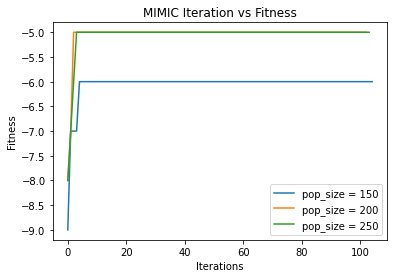

In [26]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("MIMIC Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

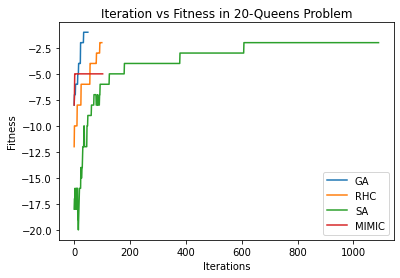

In [99]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(curve_GA))), -curve_GA[:,0], label='GA')  # ... and some more.
ax.plot(range(0,len(list(curve_RHC))), -curve_RHC[:,0], label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(curve_SA))), -curve_SA[:,0], label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(curve_MIMIC))), -curve_MIMIC[:,0], label='MIMIC')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Iteration vs Fitness in 20-Queens Problem")  # Add a title to the axes.
ax.legend()  # Add a legend.

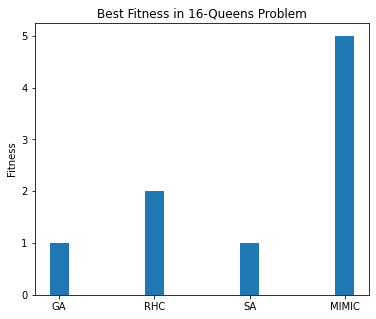

In [33]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA','MIMIC'] 
runtime_list = [fitness_GA,fitness_RHC,fitness_SA,fitness_MIMIC]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Fitness")
plt.title("Best Fitness in 16-Queens Problem")
plt.show()

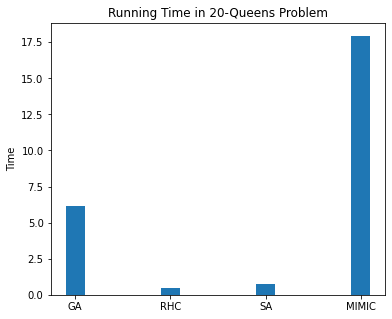

In [100]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA','MIMIC'] 
runtime_list = [time_GA,time_RHC,time_SA,time_MIMIC]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Time")
plt.title("Running Time in 20-Queens Problem")
plt.show()